In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("sales.csv")
df

# EDA

# DATA CLEANING
df.isnull().sum()

# Data transformation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   400 non-null    int64 
 1   CompPrice    400 non-null    int64 
 2   Income       400 non-null    int64 
 3   Advertising  400 non-null    int64 
 4   Population   400 non-null    int64 
 5   Price        400 non-null    int64 
 6   ShelveLoc    400 non-null    object
 7   Age          400 non-null    int64 
 8   Education    400 non-null    int64 
 9   Urban        400 non-null    object
 10  US           400 non-null    object
 11  high         400 non-null    object
dtypes: int64(8), object(4)
memory usage: 37.6+ KB


In [3]:
#---------------------------------------------------------
x_cont= df[df.columns[[1,2,3,4,5,7]]]

from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(x_cont)
SS_X = pd.DataFrame(SS_X)
SS_X.columns = list(df.columns[[1,2,3,4,5,7]])
SS_X

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["ShelveLoc"] = LE.fit_transform(df["ShelveLoc"])
df["Urban"]     = LE.fit_transform(df["Urban"])
df["US"]        = LE.fit_transform(df["US"])
df["high"]      = LE.fit_transform(df["high"])
df.head()

,Unnamed: 0,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,high
0,1,138,73,11,276,120,0,42,17,1,1,1
1,2,111,48,16,260,83,1,65,10,1,1,1
2,3,113,35,10,269,80,2,59,12,1,1,1
3,4,117,100,4,466,97,2,55,14,1,1,0
4,5,141,64,3,340,128,0,38,13,1,0,0


In [4]:
df.info()
df_cat = df[df.columns[[6,8,9,10,11]]]

df_new = pd.concat([SS_X,df_cat],axis=1)
df_new


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Unnamed: 0   400 non-null    int64
 1   CompPrice    400 non-null    int64
 2   Income       400 non-null    int64
 3   Advertising  400 non-null    int64
 4   Population   400 non-null    int64
 5   Price        400 non-null    int64
 6   ShelveLoc    400 non-null    int32
 7   Age          400 non-null    int64
 8   Education    400 non-null    int64
 9   Urban        400 non-null    int32
 10  US           400 non-null    int32
 11  high         400 non-null    int32
dtypes: int32(4), int64(8)
memory usage: 31.4 KB


,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc,Education,Urban,US,high
0,0.850455,0.155361,0.657177,0.075819,0.177823,-0.699782,0,17,1,1,1
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,0.721723,1,10,1,1,1
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.350895,2,12,1,1,1
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.103677,2,14,1,1,0
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,-0.947000,0,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0.850455,1.407551,1.560513,-0.420131,0.516132,-1.256023,1,14,1,1,1
396,0.915749,-1.633482,-0.547271,-1.547909,0.177823,0.103677,2,11,0,1,0
397,2.417512,-1.526151,0.807733,0.700853,1.827078,-0.823391,2,18,1,1,0
398,-1.630719,0.370022,0.054953,0.130170,-0.879391,-0.205346,0,12,1,1,0


In [5]:
# data partition
Y = df_new["high"]
X = df_new.drop(df_new[['high']],axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3)

In [6]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini')
DT.fit(X_train,Y_train)

Y_pred_train = DT.predict(X_train)
Y_pred_test = DT.predict(X_test)

from sklearn.metrics import accuracy_score, log_loss
training_accuracy  = accuracy_score(Y_train,Y_pred_train)
test_accuracy  = accuracy_score(Y_test,Y_pred_test)
training_loss  = log_loss(Y_train,Y_pred_train)
test_loss  = log_loss(Y_test,Y_pred_test)

import numpy as np
print("training accuracy:", np.round(training_accuracy,2))
print("test accuracy:", np.round(test_accuracy,2))
print("training loss:", np.round(training_loss,2))
print("test loss:", np.round(test_loss,2))

training accuracy: 1.0
test accuracy: 0.79
training loss: 0.0
test loss: 7.51


In [7]:
#=============================================================
# shuffle split
#=============================================================

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini')

# Set up ShuffleSplit cross-validator
from sklearn.model_selection import ShuffleSplit, cross_validate
shuffle_split = ShuffleSplit(n_splits=200, test_size=0.3, random_state=42)

# Perform cross-validation and collect both train and test scores
cv_results = cross_validate(model, X, Y, cv=shuffle_split, scoring='accuracy', return_train_score=True)

# Extract train and test scores
train_scores = cv_results['train_score']
test_scores = cv_results['test_score']

# Show individual scores and their means
print("cross validation: test accuracy:" , np.round(train_scores.mean(),2))
print("cross validation: test accuracy:" , np.round(test_scores.mean(),2))

cross validation: test accuracy: 1.0
cross validation: test accuracy: 0.72


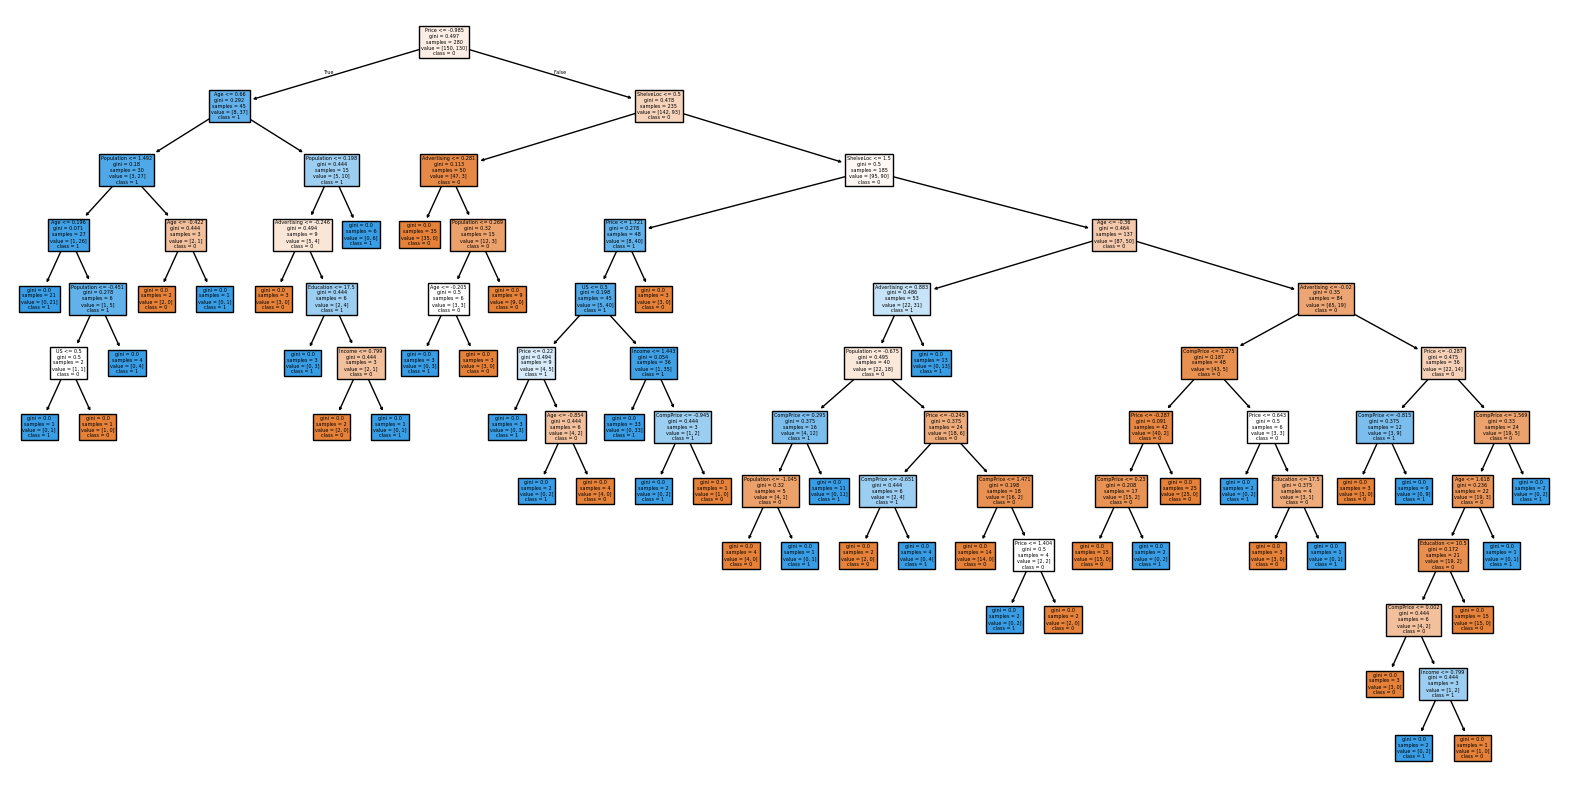

In [8]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    DT,  # Get the first fitted estimator from cross-validation
    filled=True,
    feature_names=X.columns,
    class_names=['0', '1'],
)
plt.show()

In [9]:
from sklearn.tree import DecisionTreeClassifier
n_nodes = DT.tree_.node_count
depth = DT.tree_.max_depth

print(f"Number of nodes: {n_nodes}")
print(f"Depth of the tree: {depth}")


Number of nodes: 89
Depth of the tree: 11


In [10]:
# BAGGING CLASSIFIER

from sklearn.ensemble import BaggingClassifier

# Bagging Classifier
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(criterion='gini'),
                                  n_estimators=100, random_state=42,
                                  max_samples=0.6,max_features=0.7)
bagging_model.fit(X_train, Y_train)

y_pred_train_bagging = bagging_model.predict(X_train)
y_pred_test_bagging = bagging_model.predict(X_test)

training_accuracy_bagging = accuracy_score(Y_train, y_pred_train_bagging)
test_accuracy_bagging = accuracy_score(Y_test, y_pred_test_bagging)
training_loss_bagging = log_loss(Y_train, y_pred_train_bagging)
test_loss_bagging = log_loss(Y_test, y_pred_test_bagging)

print("Bagging - Training Accuracy:", np.round(training_accuracy_bagging,2))
print("Bagging - Test Accuracy:", np.round(test_accuracy_bagging,2))
print("Bagging - Training Loss:", np.round(training_loss_bagging,2))
print("Bagging - Test Loss:", np.round(test_loss_bagging,2))

Bagging - Training Accuracy: 1.0
Bagging - Test Accuracy: 0.82
Bagging - Training Loss: 0.0
Bagging - Test Loss: 6.61


In [11]:
# prompt: just like above as you run the code for bagging classifier i need a code using random forests

from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42,
                                  max_samples=0.6, max_features=0.7,max_depth=10)
rf_model.fit(X_train, Y_train)

y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

training_accuracy_rf = accuracy_score(Y_train, y_pred_train_rf)
test_accuracy_rf = accuracy_score(Y_test, y_pred_test_rf)
training_loss_rf = log_loss(Y_train, y_pred_train_rf)
test_loss_rf = log_loss(Y_test, y_pred_test_rf)

print("Random Forest - Training Accuracy:", np.round(training_accuracy_rf,2))
print("Random Forest - Test Accuracy:", np.round(test_accuracy_rf,2))
print("Random Forest - Training Loss:", np.round(training_loss_rf,2))
print("Random Forest - Test Loss:", np.round(test_loss_rf,2))

Random Forest - Training Accuracy: 0.99
Random Forest - Test Accuracy: 0.82
Random Forest - Training Loss: 0.26
Random Forest - Test Loss: 6.61


In [12]:
# prompt: using grid search cv write down some combinations of n_estimators and max_samples and max_features

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.6, 0.7, 0.8],
    'max_features': [0.6, 0.7, 0.8]
}

# Create a RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, max_depth=10)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters and the best score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


# Evaluate the best model on the test set
best_rf_model = grid_search.best_estimator_
y_pred_test_best = best_rf_model.predict(X_test)
test_accuracy_best = accuracy_score(Y_test, y_pred_test_best)
print("Test accuracy of best model:", test_accuracy_best)


Best hyperparameters: {'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 200}
Best score: 0.825
Test accuracy of best model: 0.8333333333333334


In [13]:
# prompt: fit the model using gradient boosting

from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42,learning_rate=0.1)
gb_model.fit(X_train, Y_train)

y_pred_train_gb = gb_model.predict(X_train)
y_pred_test_gb = gb_model.predict(X_test)

training_accuracy_gb = accuracy_score(Y_train, y_pred_train_gb)
test_accuracy_gb = accuracy_score(Y_test, y_pred_test_gb)
training_loss_gb = log_loss(Y_train, y_pred_train_gb)
test_loss_gb = log_loss(Y_test, y_pred_test_gb)

print("Gradient Boosting - Training Accuracy:", np.round(training_accuracy_gb, 2))
print("Gradient Boosting - Test Accuracy:", np.round(test_accuracy_gb, 2))
print("Gradient Boosting - Training Loss:", np.round(training_loss_gb, 2))
print("Gradient Boosting - Test Loss:", np.round(test_loss_gb, 2))

Gradient Boosting - Training Accuracy: 1.0
Gradient Boosting - Test Accuracy: 0.84
Gradient Boosting - Training Loss: 0.0
Gradient Boosting - Test Loss: 5.71


In [14]:
# prompt: using grid search cv write down some combinations of n_estimators and max_samples and max_features

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1,10]
}

# Create a RandomForestClassifier
gb_model = GradientBoostingClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters and the best score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


# Evaluate the best model on the test set
best_gb_model = grid_search.best_estimator_
y_pred_test_best = best_gb_model.predict(X_test)
test_accuracy_best = accuracy_score(Y_test, y_pred_test_best)
print("Test accuracy of best model:", test_accuracy_best)

Best hyperparameters: {'learning_rate': 1, 'n_estimators': 100}
Best score: 0.8392857142857144
Test accuracy of best model: 0.825


In [15]:
# prompt: fit the model using adaboost classifier

from sklearn.ensemble import AdaBoostClassifier

# AdaBoost Classifier
ab_model = AdaBoostClassifier()
ab_model.fit(X_train, Y_train)

y_pred_train_ab = ab_model.predict(X_train)
y_pred_test_ab = ab_model.predict(X_test)

training_accuracy_ab = accuracy_score(Y_train, y_pred_train_ab)
test_accuracy_ab = accuracy_score(Y_test, y_pred_test_ab)
training_loss_ab = log_loss(Y_train, y_pred_train_ab)
test_loss_ab = log_loss(Y_test, y_pred_test_ab)

print("AdaBoost - Training Accuracy:", np.round(training_accuracy_ab, 2))
print("AdaBoost - Test Accuracy:", np.round(test_accuracy_ab, 2))
print("AdaBoost - Training Loss:", np.round(training_loss_ab, 2))
print("AdaBoost - Test Loss:", np.round(test_loss_ab, 2))

AdaBoost - Training Accuracy: 0.96
AdaBoost - Test Accuracy: 0.85
AdaBoost - Training Loss: 1.29
AdaBoost - Test Loss: 5.41


C:\Users\Kaustubh Jadhav\Downloads\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [16]:
# prompt: using grid search cv write down some combinations of n_estimators and max_samples and max_features

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1,10]
}

# Create a RandomForestClassifier
ab_model = AdaBoostClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=ab_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters and the best score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


# Evaluate the best model on the test set
best_ab_model = grid_search.best_estimator_
y_pred_test_best = best_ab_model.predict(X_test)
test_accuracy_best = accuracy_score(Y_test, y_pred_test_best)
print("Test accuracy of best model:", test_accuracy_best)

C:\Users\Kaustubh Jadhav\Downloads\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Kaustubh Jadhav\Downloads\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Kaustubh Jadhav\Downloads\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Kaustubh Jadhav\Downloads\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use t

Best hyperparameters: {'learning_rate': 1, 'n_estimators': 50}
Best score: 0.8642857142857142
Test accuracy of best model: 0.85


In [26]:
# prompt: fit the model using XGBoost

# Install XGBoost (run this only once if not installed)
!pip install xgboost

# Import necessary libraries
import xgboost as xgb
from sklearn.metrics import accuracy_score, log_loss

# Create and train the XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train, Y_train)

# Make predictions
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

# Evaluate the model
training_accuracy_xgb = accuracy_score(Y_train, y_pred_train_xgb)
test_accuracy_xgb = accuracy_score(Y_test, y_pred_test_xgb)
training_loss_xgb = log_loss(Y_train, y_pred_train_xgb)
test_loss_xgb = log_loss(Y_test, y_pred_test_xgb)

print("XGBoost - Training Accuracy:", np.round(training_accuracy_xgb, 2))
print("XGBoost - Test Accuracy:", np.round(test_accuracy_xgb, 2))
print("XGBoost - Training Loss:", np.round(training_loss_xgb, 2))
print("XGBoost - Test Loss:", np.round(test_loss_xgb, 2))

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 799.2 kB/s eta 0:01:30
    --------------------------------------- 1.0/72.0 MB 1.4 MB/s eta 0:00:51
    --------------------------------------- 1.3/72.0 MB 1.6 MB/s eta 0:00:45
    --------------------------------------- 1.6/72.0 MB 1.5 MB/s eta 0:00:47
   - -------------------------------------- 1.8/72.0 MB 1.4 MB/s eta 0:00:51
   - -------------------------------------- 2.1/72.0 MB 1.4 MB/s eta 0:00:49
   - -------------------------------------- 2.4/72.0 MB 1.3 MB/s eta 0:00:52
   - -------------------------------------- 2.6/72.0 MB 1.4 MB/s eta 0:00:49
   - ---------------------------

In [27]:
# prompt: using grid search cv, write down some param grid for n_estimators,learning_rate,gamma,lambda

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'gamma': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 1]
}

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Create the GridSearchCV object for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search_xgb.fit(X_train, Y_train)

# Print the best hyperparameters and the best score for XGBoost
print("XGBoost - Best hyperparameters:", grid_search_xgb.best_params_)
print("XGBoost - Best score:", grid_search_xgb.best_score_)

# Evaluate the best XGBoost model on the test set
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_test_best_xgb = best_xgb_model.predict(X_test)
test_accuracy_best_xgb = accuracy_score(Y_test, y_pred_test_best_xgb)
print("XGBoost - Test accuracy of best model:", test_accuracy_best_xgb)

XGBoost - Best hyperparameters: {'gamma': 0.1, 'learning_rate': 0.2, 'n_estimators': 100, 'reg_lambda': 0}
XGBoost - Best score: 0.8357142857142857
XGBoost - Test accuracy of best model: 0.825
